In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../../data/data_latinoamerica.csv")

In [3]:
df = df[df['location_key'] == 'CO']

In [4]:
df.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
6475194,CO,2020-01-01,CO,Colombia,0.0,0.0,0.0,0.0,NaN,50882884.0,...,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8,NaN,NaN
6475195,CO,2020-01-02,CO,Colombia,0.0,0.0,0.0,0.0,NaN,50882884.0,...,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8,NaN,NaN
6475196,CO,2020-01-03,CO,Colombia,0.0,0.0,0.0,0.0,NaN,50882884.0,...,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8,NaN,NaN
6475197,CO,2020-01-04,CO,Colombia,0.0,0.0,0.0,0.0,NaN,50882884.0,...,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8,NaN,NaN
6475198,CO,2020-01-05,CO,Colombia,0.0,0.0,0.0,0.0,NaN,50882884.0,...,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8,NaN,NaN


### Contar cuantos valores Nulos tiene cada columna

In [5]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              4
new_deceased                               4
cumulative_confirmed                       4
cumulative_deceased                        4
cumulative_vaccine_doses_administered    657
average_temperature_celsius                7
minimum_temperature_celsius                7
maximum_temperature_celsius                7
rainfall_mm                               94
relative_humidity                          7
new_recovered                            303
cumulative_recovered                     303
dtype: int64


### Contar cuantos 0 tiene cada columna

In [6]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 185 rows with zero values.
Column 'new_deceased' has 193 rows with zero values.
Column 'cumulative_confirmed' has 65 rows with zero values.
Column 'cumulative_deceased' has 67 rows with zero values.
Column 'rainfall_mm' has 413 rows with zero values.
Column 'new_recovered' has 8 rows with zero values.
Column 'cumulative_recovered' has 6 rows with zero values.

Counts of zero values per column: {'new_confirmed': 185, 'new_deceased': 193, 'cumulative_confirmed': 65, 'cumulative_deceased': 67, 'rainfall_mm': 413, 'new_recovered': 8, 'cumulative_recovered': 6}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [7]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_co= df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [8]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_co = df_co.copy()
df_co.drop(columns=columns_to_drop, inplace=True)

In [9]:
df_co.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6475194,CO,2020-01-01,CO,Colombia,0.0,0.0,NaN,50882884.0,24984564.0,25898320.0,...,21.962963,79.195200,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8
6475195,CO,2020-01-02,CO,Colombia,0.0,0.0,NaN,50882884.0,24984564.0,25898320.0,...,23.027778,74.373649,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8
6475196,CO,2020-01-03,CO,Colombia,0.0,0.0,NaN,50882884.0,24984564.0,25898320.0,...,23.583333,69.195171,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8
6475197,CO,2020-01-04,CO,Colombia,0.0,0.0,NaN,50882884.0,24984564.0,25898320.0,...,23.574074,63.788427,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8
6475198,CO,2020-01-05,CO,Colombia,0.0,0.0,NaN,50882884.0,24984564.0,25898320.0,...,23.324074,66.070403,10779376.0,1090598.0,36132.0,77.109,151.616,77.999,37.0,15.8


In [10]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_co.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    640
average_temperature_celsius                3
relative_humidity                          3
dtype: int64


In [11]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_co.columns[(df_co == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_co[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 174 rows with zero values.
Column 'new_deceased' has 182 rows with zero values.

Counts of zero values per column: {'new_confirmed': 174, 'new_deceased': 182}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [12]:
# Imputación con la media para columnas específicas

df_co.loc[:, 'average_temperature_celsius'] = df_co['average_temperature_celsius'].fillna(df_co['average_temperature_celsius'].mean())
df_co.loc[:, 'relative_humidity'] = df_co['relative_humidity'].fillna(df_co['relative_humidity'].mean())


In [13]:
# Rellenar con 0 donde la fecha sea menor a '2021-02-17'
fecha_limite = '2020-12-29'
df_co.loc[df['date'] < fecha_limite] = df_co.loc[df['date'] < fecha_limite].fillna(0)

In [14]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 185 rows with zero values.
Column 'new_deceased' has 193 rows with zero values.
Column 'cumulative_confirmed' has 65 rows with zero values.
Column 'cumulative_deceased' has 67 rows with zero values.
Column 'rainfall_mm' has 413 rows with zero values.
Column 'new_recovered' has 8 rows with zero values.
Column 'cumulative_recovered' has 6 rows with zero values.

Counts of zero values per column: {'new_confirmed': 185, 'new_deceased': 193, 'cumulative_confirmed': 65, 'cumulative_deceased': 67, 'rainfall_mm': 413, 'new_recovered': 8, 'cumulative_recovered': 6}


In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_co.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,697.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,6467.76,169.45,17872613.48,50882884.00,24984564.00,25898320.00,45.86,0.75,7414155.00,8119876.00,...,20.57,74.70,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
std,7981.72,178.45,27015765.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,7.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,50882884.00,24984564.00,25898320.00,45.86,0.75,7414155.00,8119876.00,...,11.44,47.27,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
25%,291.50,12.00,0.00,50882884.00,24984564.00,25898320.00,45.86,0.75,7414155.00,8119876.00,...,18.97,69.67,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
50%,2919.50,108.00,0.00,50882884.00,24984564.00,25898320.00,45.86,0.75,7414155.00,8119876.00,...,21.47,75.18,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
75%,9612.00,242.75,33963461.00,50882884.00,24984564.00,25898320.00,45.86,0.75,7414155.00,8119876.00,...,23.13,79.99,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
max,40415.00,716.00,87566541.00,50882884.00,24984564.00,25898320.00,45.86,0.75,7414155.00,8119876.00,...,26.34,96.06,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80


In [16]:
#calcular columna vacunas administradas por dia
g=df_co.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_co['vaccine_doses_administered_for_day']=h

df_co.vaccine_doses_administered_for_day.max()

1036209.0

In [17]:
df_co.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

In [18]:
# Crear la columna del acumulado de vacunas diarias
df_co['cumulative_vaccine_doses_administered'] = df_co['vaccine_doses_administered_for_day'].cumsum()

col = list(df_co.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_co = df_co[col]
df_co

,location_key,date,country_code,country_name,new_confirmed,new_deceased,population,cumulative_vaccine_doses_administered,population_male,population_female,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,vaccine_doses_administered_for_day
6475194,CO,2020-01-01,CO,Colombia,0.00,0.00,50882884.00,0.00,24984564.00,25898320.00,...,79.20,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,0.00
6475195,CO,2020-01-02,CO,Colombia,0.00,0.00,50882884.00,0.00,24984564.00,25898320.00,...,74.37,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,0.00
6475196,CO,2020-01-03,CO,Colombia,0.00,0.00,50882884.00,0.00,24984564.00,25898320.00,...,69.20,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,0.00
6475197,CO,2020-01-04,CO,Colombia,0.00,0.00,50882884.00,0.00,24984564.00,25898320.00,...,63.79,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,0.00
6475198,CO,2020-01-05,CO,Colombia,0.00,0.00,50882884.00,0.00,24984564.00,25898320.00,...,66.07,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476163,CO,2022-08-27,CO,Colombia,0.00,0.00,50882884.00,NaN,24984564.00,25898320.00,...,71.11,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,NaN
6476164,CO,2022-08-28,CO,Colombia,0.00,0.00,50882884.00,NaN,24984564.00,25898320.00,...,76.91,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,NaN
6476165,CO,2022-08-29,CO,Colombia,0.00,0.00,50882884.00,NaN,24984564.00,25898320.00,...,78.38,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,NaN
6476166,CO,2022-08-30,CO,Colombia,0.00,0.00,50882884.00,NaN,24984564.00,25898320.00,...,69.84,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80,NaN


In [19]:
col = list(df_co.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_co = df_co[col]
df_co

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6475194,CO,2020-01-01,CO,Colombia,0.00,0.00,0.00,50882884.00,0.00,24984564.00,...,21.96,79.20,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
6475195,CO,2020-01-02,CO,Colombia,0.00,0.00,0.00,50882884.00,0.00,24984564.00,...,23.03,74.37,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
6475196,CO,2020-01-03,CO,Colombia,0.00,0.00,0.00,50882884.00,0.00,24984564.00,...,23.58,69.20,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
6475197,CO,2020-01-04,CO,Colombia,0.00,0.00,0.00,50882884.00,0.00,24984564.00,...,23.57,63.79,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
6475198,CO,2020-01-05,CO,Colombia,0.00,0.00,0.00,50882884.00,0.00,24984564.00,...,23.32,66.07,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6476163,CO,2022-08-27,CO,Colombia,0.00,0.00,NaN,50882884.00,NaN,24984564.00,...,22.56,71.11,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
6476164,CO,2022-08-28,CO,Colombia,0.00,0.00,NaN,50882884.00,NaN,24984564.00,...,20.97,76.91,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
6476165,CO,2022-08-29,CO,Colombia,0.00,0.00,NaN,50882884.00,NaN,24984564.00,...,19.82,78.38,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
6476166,CO,2022-08-30,CO,Colombia,0.00,0.00,NaN,50882884.00,NaN,24984564.00,...,20.90,69.84,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80


In [20]:
df_co.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,618.00,974.00,618.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,6467.76,169.45,81375.90,50882884.00,8815116.84,24984564.00,25898320.00,45.86,0.75,7414155.00,...,20.57,74.70,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
std,7981.72,178.45,127544.98,0.00,15123353.93,0.00,0.00,0.00,0.00,0.00,...,3.40,7.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,50882884.00,0.00,24984564.00,25898320.00,45.86,0.75,7414155.00,...,11.44,47.27,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
25%,291.50,12.00,0.00,50882884.00,0.00,24984564.00,25898320.00,45.86,0.75,7414155.00,...,18.97,69.67,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
50%,2919.50,108.00,0.00,50882884.00,0.00,24984564.00,25898320.00,45.86,0.75,7414155.00,...,21.47,75.18,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
75%,9612.00,242.75,146009.75,50882884.00,12132482.25,24984564.00,25898320.00,45.86,0.75,7414155.00,...,23.13,79.99,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
max,40415.00,716.00,1036209.00,50882884.00,50290307.00,24984564.00,25898320.00,45.86,0.75,7414155.00,...,26.34,96.06,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80


In [21]:
# Calcular media y desvio estandar
media = df_co['vaccine_doses_administered_for_day'].mean()
desvio_estandar = df_co['vaccine_doses_administered_for_day'].std()

# Definir los límites para considerar outliers
lower_bound = media - 3 * desvio_estandar
upper_bound = media + 3 * desvio_estandar

# Verificar si lower_bound es menor a 0
if lower_bound < 0:
    lower_bound = 0

# Filtrar el DataFrame para ver los outliers
df_co[(df_co['vaccine_doses_administered_for_day'] < lower_bound) | (df_co['vaccine_doses_administered_for_day'] > upper_bound)]


,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6475751,CO,2021-07-11,CO,Colombia,13199.00,529.00,1036209.00,50882884.00,15119683.00,24984564.00,...,20.59,77.95,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
6475894,CO,2021-12-01,CO,Colombia,2444.00,80.00,730708.00,50882884.00,37273403.00,24984564.00,...,22.25,74.71,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80


In [22]:
# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df_co[(df_co['vaccine_doses_administered_for_day'] >= lower_bound) & (df_co['vaccine_doses_administered_for_day'] <= upper_bound)]

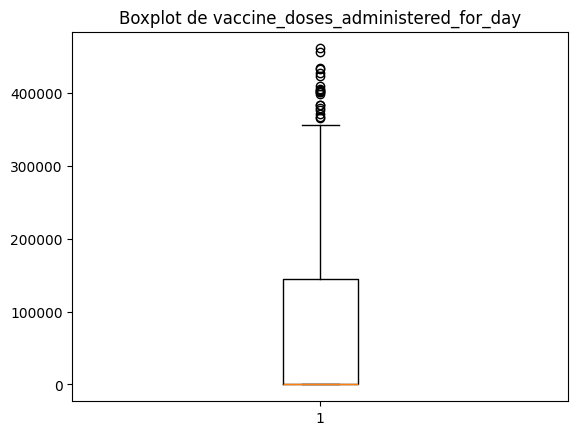

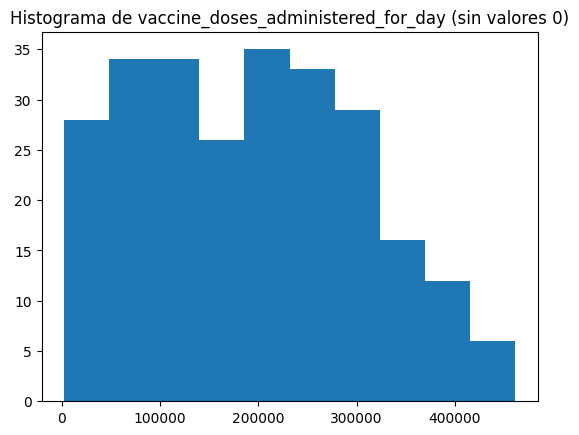

In [23]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Filtrar los datos para excluir los valores 0
df_filtered_non_zero = df_filtered[df_filtered['vaccine_doses_administered_for_day'] > 0]

# Histograma con matplotlib
plt.hist(df_filtered_non_zero['vaccine_doses_administered_for_day'], bins=10)  # el número de bins se puede ajustar a preferencia
plt.title('Histograma de vaccine_doses_administered_for_day (sin valores 0)')
plt.show()

In [24]:
avg_vaccine = round(df_co['vaccine_doses_administered_for_day'].mean(), 0)

df_prueba = df_co.copy()  # Crear una copia del DataFrame original

# Reemplazar los valores por encima del valor máximo o por debajo del valor mínimo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound or x < lower_bound else x
)


In [25]:
df_prueba.to_csv('../../data/processed/covid19_Colombia.csv', index=False)


In [26]:
df_prueba.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,618.00,974.00,618.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,6467.76,169.45,78780.17,50882884.00,8815116.84,24984564.00,25898320.00,45.86,0.75,7414155.00,...,20.57,74.70,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
std,7981.72,178.45,118743.29,0.00,15123353.93,0.00,0.00,0.00,0.00,0.00,...,3.40,7.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,50882884.00,0.00,24984564.00,25898320.00,45.86,0.75,7414155.00,...,11.44,47.27,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
25%,291.50,12.00,0.00,50882884.00,0.00,24984564.00,25898320.00,45.86,0.75,7414155.00,...,18.97,69.67,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
50%,2919.50,108.00,0.00,50882884.00,0.00,24984564.00,25898320.00,45.86,0.75,7414155.00,...,21.47,75.18,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
75%,9612.00,242.75,144767.00,50882884.00,12132482.25,24984564.00,25898320.00,45.86,0.75,7414155.00,...,23.13,79.99,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
max,40415.00,716.00,461116.00,50882884.00,50290307.00,24984564.00,25898320.00,45.86,0.75,7414155.00,...,26.34,96.06,10779376.00,1090598.00,36132.00,77.11,151.62,78.00,37.00,15.80
